In [1]:
import tensorflow as tf


from ipywidgets import interact, interactive
import os
import numpy as np
import sys
import timeit
import csv
sys.path.append('/Users/zhouji/Google Drive/RWTH/GP_old')

import matplotlib.pyplot as plt

import gempy as gp
from gempy.core.tensor.tensorflow_graph_test import TFGraph
import tensorflow as tf
import tensorflow_probability as tfp
import pandas as pd
from gempy import create_data, map_series_to_surfaces
from gempy.assets.geophysics import GravityPreprocessing
tfd = tfp.distributions

In [2]:
geo_model = gp.create_model('Fold')

path = '/Users/zhouji/Google Drive/RWTH/GP_old/notebooks/'
# set regular grid to low resolution to save memory

gp.init_data(geo_model, [0, 1000., 0, 1000., 0, 1000.], [50, 50, 50],
                 path_o=path+ "/data/input_data/George_models/model2_1_orientations.csv",
                  path_i=path + "/data/input_data/George_models/180surface_points.csv",
             default_values=True)

gp.map_stack_to_surfaces(geo_model,
                        {"Strat_Series": (
    'rock2', 'rock1'), "Basement_Series": ('basement')},
                         remove_unused_series=True)

# geo_data = create_data([0, 1000, 0, 1000, 0, 1000], resolution=[50, 50, 50],
#                       path_o=path+ "/data/input_data/George_models/model2_1_orientations.csv",
#                       path_i=path + "/data/input_data/George_models/180surface_points.csv")
# map_series_to_surfaces(geo_data, {"Strat_Series": (
#     'rock2', 'rock1'), "Basement_Series": ('basement')})

Active grids: ['regular']


,surface,series,order_surfaces,color,id
0,rock1,Strat_Series,1,#015482,1
1,rock2,Strat_Series,2,#9f0052,2
2,basement,Basement_Series,1,#ffbe00,3


In [3]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1732.05
$C_o$            71428.6
drift equations   [3, 3]


In [4]:
sol = gp.compute_model(geo_model)

/Users/zhouji/Documents/github/gempy/gempy/plot/plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


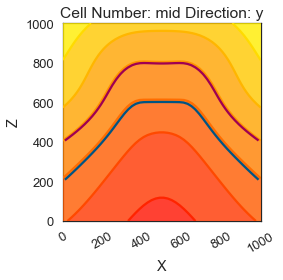

In [5]:
gp.plot_2d(geo_model, show_data=False, show_scalar=True, show_lith=False)
plt.show()

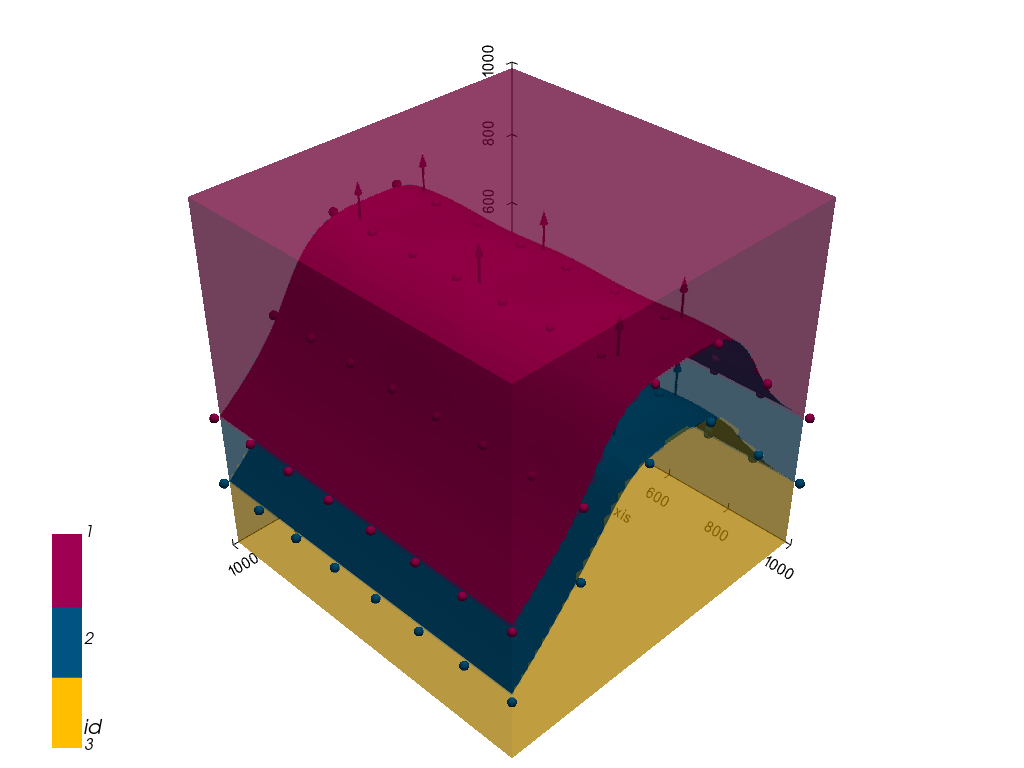

<Figure size 432x288 with 0 Axes>

In [8]:
pv = gp.plot_3d(geo_model,show_surfaces=True, notebook=True)


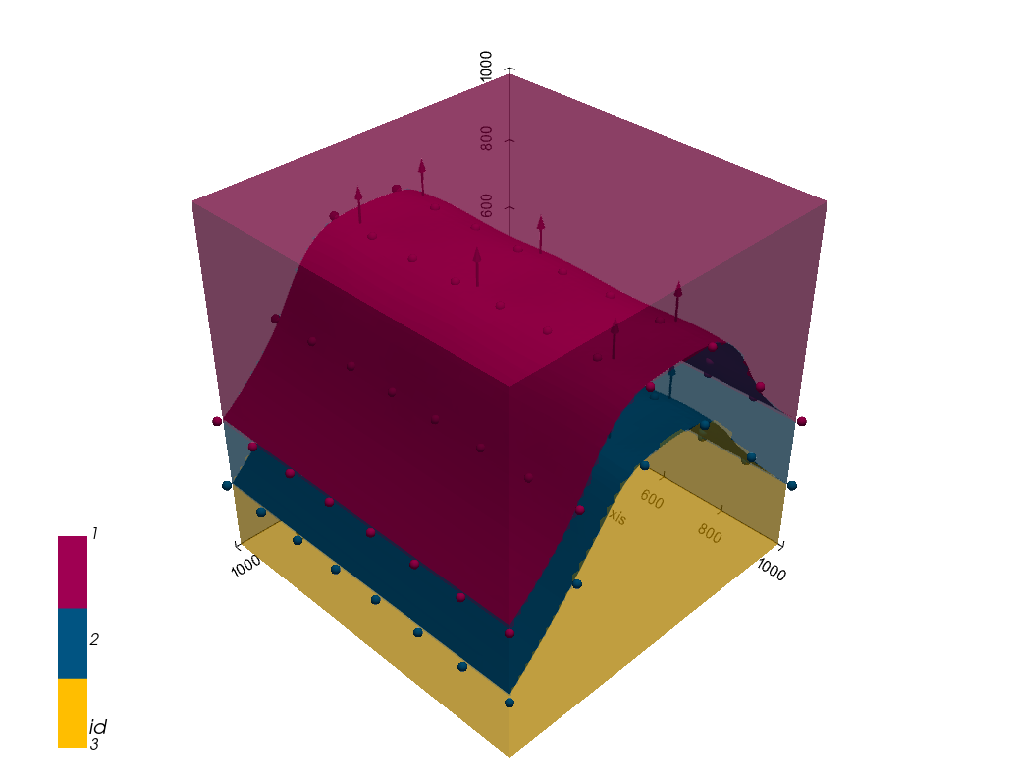

In [22]:
fig, ax = plt.subplots(figsize=(18, 14))
ax.imshow(pv.p.image,interpolation='nearest',aspect='auto')
plt.axis('off')
plt.savefig('/Users/zhouji/Documents/Presentations/IRTG 2020/Poster_IRTG_2020/figs/3D_block.png')